<table><tr><th>
<div align="center" > 
    <div style="margin: 0 auto; display: inline-block">    
    <h1 align="center">Introduction to Python</h1>
    <h2 align="center">Pandas</h2>
    <h3 align="center">Matthew Hielsberg</h3>
    <h3 align="center" style='color: #500000; font-family: open-sans; text-decoration: none;'><a style='color: #500000; font-family: open-sans; text-decoration: none;' href="https://www.math.tamu.edu">Department of Mathematics</a> &amp; <a style='color: #500000; font-family: open-sans; text-decoration: none;'  href="https://tamids.tamu.edu/">Institute of Data Science</a></h3>
</div>
</th>
<th>   
<div style="width:250px; display: inline-block;">
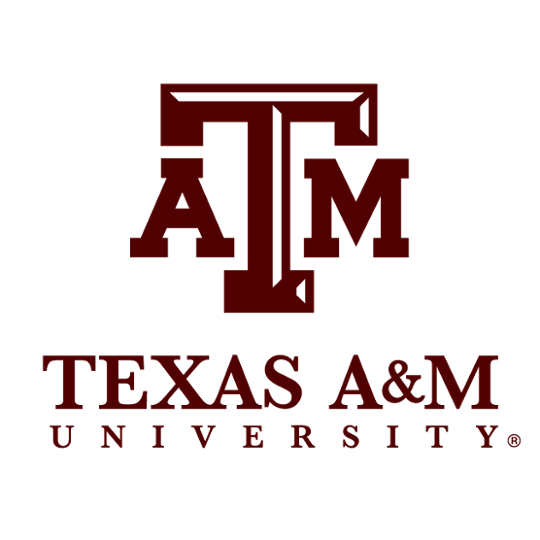 
    </div>
</div>
</th></tr></table>

# Pandas


The [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) package is built on top of NumPy and provides fast, flexible and expressive data structures for working with "relational" or "labeled" data.  It supports many different types of data:

- Tabular data with heterogeneously-typed columns (SQL table or Excel spreadsheet)
- Ordered and unordered time series data
- Arbitrary matrix data with row/column labels
- Any other form of observational / statistical data sets.  Labels are not a requirement to be placed into a pandas data structure.

There are two primary data structures in Pandas that can handle the majority of use cases.  These are [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) (1-D labeled homogeneously-typed array) and [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) (General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns).  To put these in context, DataFrame is a container for Series, and Series is a container for scalars.  Also, the creators of Pandas wanted to be able to insert and remove objects from these containers in a dictionary-like fashion.  

Among other things, here is a quick list of features supported in Pandas:

- Easy handling of missing data (represented as NA) in floating point as well as non-floating point data
- Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
- Intuitive merging and joining data sets
- Flexible reshaping and pivoting of data sets
- Hierarchical labeling of axes (possible to have multiple labels per tick)
- Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging.




## Import Pandas

To get started we must first import pandas and numpy, as we will be using functions from both in the following examples.  Some of the examples here come from the [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) tutorial in the [user guide](https://pandas.pydata.org/docs/user_guide/index.html).  It is strongly recommended that you check this out as it and the guide have much more information that can be covered here.

In [ ]:
import pandas as pd
import numpy as np

## Object Creation

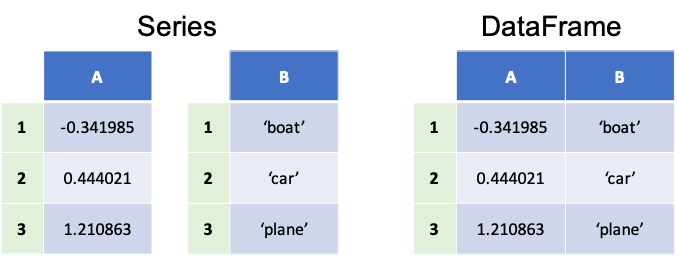

### Series

A [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) is a 1-D labeled homogeneously-typed labeled array, capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).  The axis labels are collectively referred to as the index.

The following example creates a pandas series from a Python list, and uses the default integer index as labels.

In [ ]:
data = [1, 3, 5, np.nan, 6, 8]  # v1.0.0 uses pd.NA
s = pd.Series(data)
s

In [ ]:
s = pd.Series(data, dtype=pd.Int64Dtype())
s

The data used to create a Series can be a Python dict, an ndarray, or a scalar.  In the above example, the default labels, indices, were used.  However, we can also specify those labels explicitly.

In [ ]:
labels = ['A', 'Z', 'G', 'D', 'C', 'F']
s2 = pd.Series(data, index=labels)
s2

If a dictionary is used to create the Series and no index is specified then the order of the elements in the dictionary will be used in the Series.

In [ ]:
data_dict = {'A':1, 'Z':3, 'G':5, 'D':np.nan, 'C':6, 'F':8}
s3 = pd.Series(data_dict)
s3

When specifying an index with a dictionary, only those elements specified by the index will be pulled from the dictionary (in the order specified) to create the Series.  If labels from the index do not match anything in the dict then NaN will be used.

In [ ]:
s4 = pd.Series(data_dict, index=['Z', 'G', 'C', 'A', 'M'])
s4

If the data used to create the Series is a scalar the resulting Series will have length equal to that of the given index.  If no index is specified the length is one.

In [ ]:
s5 = pd.Series(5)
s5

In [ ]:
s6 = pd.Series(5, index=labels)
s6

### DataFrame

A [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is a general 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns.  This object can be thought of as a dict-like container for Series objects.

The following example uses column labels A, B, C and D for a 6x4 ndarray of random values.

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), 
                  columns=list('ABCD'))
df

The row labels can be types other than string and integer.  The following uses a range of dates (see [pd.date_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html?highlight=date_range#pandas.date_range)).

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), 
                  index=dates,
                  columns=list('ABCD'))
df

We can also use a dictionary to create a DataFrame.  Notice how the DataFrame duplicates values in order to give the same length in all columns.

In [ ]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

Also, notice that each column in the DataFrame may have different [dtypes](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes).

In [ ]:
df2.dtypes

### Mutability and Copying of Data

All pandas data structures are value-mutable, but not always size-mutable.  For example, the length of a Series cannot be changed, but columns can be inserted into a DataFrame.  The vast majority of methods favor immutability and produce new objects rather than altering the input data.  Many of these methods also provide an `inline` argument that can be used to override this behavior; this will be outlined in their documentation.

## Viewing Data

Similar to your command line shell, you may use [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) and [`tail`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail) to view the beginning or end of your data, respectively.  The argument to each tells the number of rows to display; the default is five.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(6, 4), 
                  index=pd.date_range('20130101', periods=6),
                  columns=list('ABCD'))
df

Return the table data as an `ndarray`.

In [ ]:
df.values

View the first 3 rows of the DataFrame or Series.

In [ ]:
df.head(3)

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s.head(3)  # using our Series, s, from an earlier example

Similarly view the last 4 rows.

In [ ]:
df.tail(4)

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=['A', 'Z', 'G', 'D', 'C', 'F'])

s.tail(4)

### Label Summaries (index and columns)

The index and column labels can also be viewed.

In [ ]:
df.index

In [ ]:
df.columns

Return the set of unique indices using [`Index.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.unique.html).

In [ ]:
df.index.unique() 

### Data Summaries (describe and info)

The [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) method shows a quick statistic summary of your data.

In [ ]:
df.describe()

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s.describe()  # recall that NaN is treated as missing data

In [ ]:
s = pd.Series(['A', 'Z', np.NaN, 'D', 'C', 'F', 'Z'])

s.describe() 

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function prints information about a DataFrame, including index and column dtypes, non-null values and memory usage. 

In [ ]:
df.info()

MIT License

Copyright (c) 2022 Department of Mathematics, Texas A&M University

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and
associated documentation files (the "Software"), to deal in the Software without restriction, including
without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so, subject to the following
conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions
of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN
AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION
WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.